In [1]:
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop
from tensorflow.keras.layers import (
    Dense,
    Dropout,
    Flatten,
    Activation,
    Conv2D,
    MaxPooling2D,
)
from keras.models import Sequential
import matplotlib.pyplot as plt
from loguru import logger
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers
import tensorflow as tf
from tensorflow.keras.layers import Rescaling
from tensorflow.keras import layers
from tensorflow import keras

In [14]:
import pandas as pd

flowers_desktop = "E:\\Github sparade filer\\Deep-Learning\\data\MNIST\\raw\\flowers"
flower_laptop = "C:\\Github\\Deep-Learning\\data\\MNIST\\raw\\flowers"
data = []
labels = []

for folder in os.listdir(flower_laptop):  # loops through folders in flowers folders
    logger.info(f"looping through {folder} folders")
    for file in os.listdir(os.path.join(flower_laptop, folder)): # Loops through each individual picture in each folder
        #logger.info(f"looping through files in {file} folders")
        if file.endswith("jpg"): # only jpgs
            labels.append(folder) 
            #logger.info(f"Appending {labels} to {folder}")
            img = cv2.imread(os.path.join(flower_laptop, folder, file)) # reads the image
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
            im = cv2.resize(img_rgb, (128, 128)) # resizes the image because they are all different sizes
            data.append(im) # appends image to data folder
        else:
            continue

# need to convert data labels from list to numpy array in order to normalize in this case
# can't divide a list by a number
data_arr = np.array(data)
label_arr = np.array(labels)

# creates X and y aswell as normalizing X
encoder = LabelEncoder() # converts labels to numbers
y = encoder.fit_transform(labels) # fits labels and return encoded labels
y = to_categorical(y, 5)
X = data_arr / 255 # 255 (not 256 because starts at 0) is the max value of a pixel
# normalize data for faster convergence, consistent and optimized scales for training

2023-12-13 11:04:44.285 | INFO     | __main__:<module>:9 - looping through daisy folders
2023-12-13 11:04:49.861 | INFO     | __main__:<module>:9 - looping through dandelion folders
2023-12-13 11:04:57.576 | INFO     | __main__:<module>:9 - looping through rose folders
2023-12-13 11:05:03.192 | INFO     | __main__:<module>:9 - looping through sunflower folders
2023-12-13 11:05:08.842 | INFO     | __main__:<module>:9 - looping through tulip folders


In [15]:
folder_counts = {}

# loops through each category in flowers folder
for folder in os.listdir(flower_laptop):
    if os.path.isdir(os.path.join(flower_laptop, folder)):
        # counts how many images there are in each folder
        count = len(
            [
                file
                for file in os.listdir(os.path.join(flower_laptop, folder))
                if file.endswith(".jpg")
            ]
        )
        folder_counts[folder] = count

print(folder_counts)
# Abit unbalanced but not too bad

{'daisy': 764, 'dandelion': 1052, 'rose': 784, 'sunflower': 733, 'tulip': 984}


In [30]:
from sklearn.model_selection import train_test_split

# train val split 80/20
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [31]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(128,
                                  128,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

def base_model():
    model = Sequential()
    model.add(data_augmentation)
    
    model.add(Conv2D(16, (3, 3), padding="same", activation="relu", input_shape=(128, 128, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Flatten())
    model.add(Dense(256, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(0.3))
    model.add(Dense(5, activation="softmax"))
    return model

model = base_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/20
108/108 [==============================] - 44s 349ms/step - loss: 1.8826 - accuracy: 0.3878 - val_loss: 1.3230 - val_accuracy: 0.4248
Epoch 2/20
108/108 [==============================] - 32s 300ms/step - loss: 1.2637 - accuracy: 0.5007 - val_loss: 1.2501 - val_accuracy: 0.4815
Epoch 3/20
108/108 [==============================] - 33s 306ms/step - loss: 1.1669 - accuracy: 0.5566 - val_loss: 1.1146 - val_accuracy: 0.5938
Epoch 4/20
108/108 [==============================] - 30s 276ms/step - loss: 1.0819 - accuracy: 0.6061 - val_loss: 1.1238 - val_accuracy: 0.6042
Epoch 5/20
108/108 [==============================] - 30s 274ms/step - loss: 1.0669 - accuracy: 0.6090 - val_loss: 1.0247 - val_accuracy: 0.6192
Epoch 6/20
108/108 [==============================] - 35s 323ms/step - loss: 1.0286 - accuracy: 0.6331 - val_loss: 1.0864 - val_accuracy: 0.6250
Epoch 7/20
108/108 [==============================] - 34s 313ms/step - loss: 0.9904 - accuracy: 0.6510 - val_loss: 1.0241 - val_ac

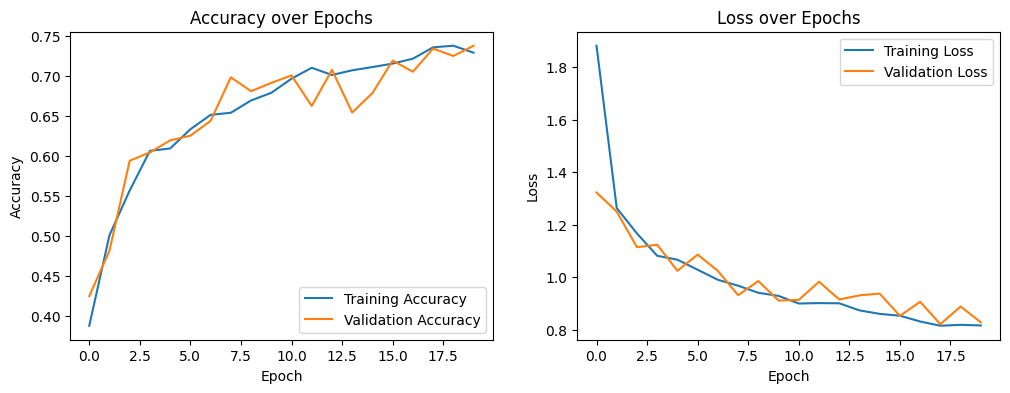

In [32]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

I adjusted train val split so I don't include test data that doesn't get used. So now it's a 80/20 split instead of a 70/15/15 split. I also added data augmentation which -----

```Python
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(128,
                                  128,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

def base_model():
    model = Sequential()
    model.add(data_augmentation)
    
    model.add(Conv2D(16, (3, 3), padding="same", activation="relu", input_shape=(128, 128, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(0.3))
    model.add(Dense(5, activation="softmax"))
    return model

model = base_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
```

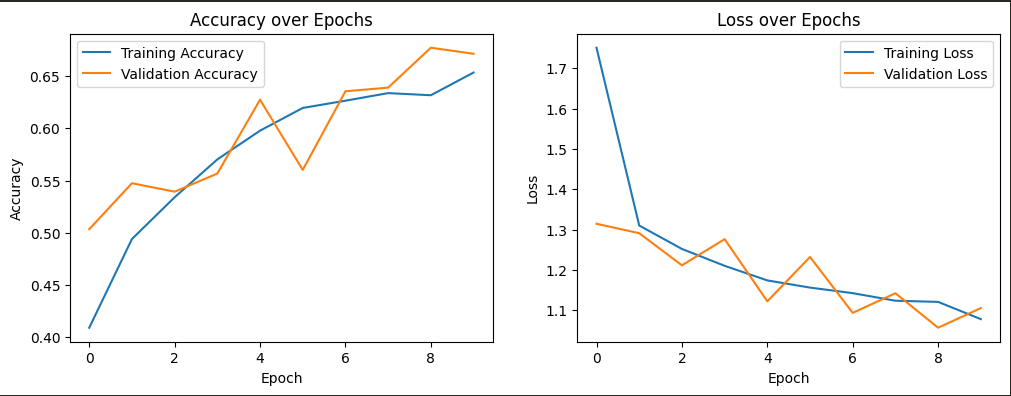

I also tried decreasing the amount of neurons for each convolutional layer just to make sure that I'm not making the model unecessarily complex. With this change I also again decreased Dropout rate from 0.5 to 0.3 just to check how changing dropout will affect overfitting now that the model decreased in complexity. The result from this seems to be about the same (as model above), I'm not entirely sure how the dropout rate effects computation, it seems to be the same so I'll keep it at 0.3 for now.

I'm also going to test increasing Dense layer from 128 to 256 aswell as add a 4th convolutional layer aswell as increase epochs to 20. If the result of this is just very slightly better than the model from above, then I'm going to guess that I'm getting close to getting the model as good as I can with the computational power I have.

Now the model looks like this

```Python
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(128,
                                  128,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

def base_model():
    model = Sequential()
    model.add(data_augmentation)
    
    model.add(Conv2D(16, (3, 3), padding="same", activation="relu", input_shape=(128, 128, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Flatten())
    model.add(Dense(256, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(0.3))
    model.add(Dense(5, activation="softmax"))
    return model

model = base_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
```

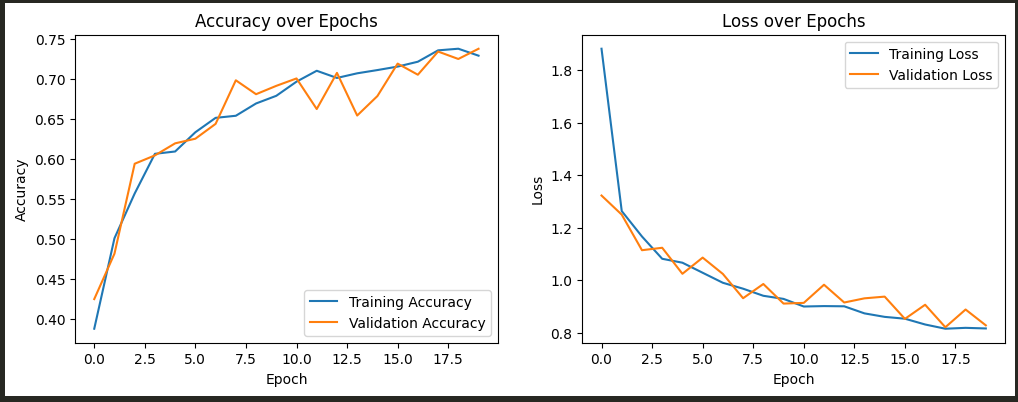

While it took about 12 minute to run the, I'm very happy with the result and glad that I tested the changes above. At this point I don't think I'm going to get the model to perform much better. I would like to increase the complexity even more aswell as increase the amount of epochs, however that will take alot of time to test and I would preferably use something like AWS Sagemaker and use their computational power rather than my mediocre laptop.

There is still things like testing different hyperparameters (learning rate, epochs, optimizers, activation functions, etc), variation in data augmentation (I have what seems like quite simple data augmentation), Early stopping and so on... It would also be interesting to test how different kinds of complexity would effect the metrics. For example fewer convolutional layers, but bigger amount of neurons in each layer and vice versa.

There is plently still left to test, but like I mentioned earlier, it would make sense to transfer this model into a cloud service to use their computational power.

# VG Uppgift - Transfer Learning

- Systematisk plocka fram de bästa hyperparameterarna för ditt nätverk
- basera TL på någon utav modellerna [här](https://www.tensorflow.org/api_docs/python/tf/keras/applications):


**Frågor att besvara:**
-  **Motivera ditt modellval**
   -  Precis som vi såg på G-uppgiften så är beräkningskraft något som är viktigt att tänka på i det här fallet, så jag kommer försöka undevika onödigt komplicerade modeller som kanske fungerar väldigt väl, men som tar väldigt lång tid att köra. Dessutom har vi inte ett jätte komplicerat problem med det datasetet som vi använder, vilket troligtvis betyder att en mediokre modell kommer fungerar helt fine för det problemet som vi står inför.
   -  Det kan också vara viktigt att kolla vad modellerna är tränade på för bilder, efterliknar träningsdatan från dessa modeller den data som jag använder?
-  Förklara hur du genomfört transfer learning.
   -  Im using feature extraction for this transfer learning model, but not fine-tuning. This is for a variety of reason, but the main one being computational power. It already takes hours to run keras tuner in order to get the best values. However, that would be part of the next steps I would take in order to make the model even better. 
-  Förklara hur du *systematiskt* valt de bästa hyperparametrarna (ska framgå i koden).
   -  I've used the Keras tuner in order to find the best hyperparameters, more specifically: the Hyperband algorithm. What's cool about this algorithm is that it uses a championship style way of finding the best hyperparameters. The idea here is the the best hyperparamters will ofcourse always rise to the top and "win". The reason why using Hyperband is better than Randomsearch is this: Instead of doing a full training for values that are bad, it will instead train for a few epochs then pick the best hyperparameters based on the results from the few epochs that are run. Finally it fully trains the model with the best hyperparameters Hyperband found. This is obviously advantagious because we're on laptops and computational power is an issue. Because of this, I've opted to go with feature extraction and not use fine-tuning here, which means that if I were to have more time and power, that is the next step to try. I also didn't use GridSearch because we've used it for a notebook before aswell as in earlier courses, and it's interesting to test something new. 
   -  Knowing that the model I've switched to is larger, I have to make a few compromises when looking for the best hyperparameters because otherwise it'll take forever to run. This means that I have few layers on-top of the pre-trained model so it doesn't take too long to train the model. Aswell as increasing the "steps" between hyperparameter values. Luckily using the keras tuner made this simple. I basically just added a min and max value, aswell as steps. It's also important to note that while doing the tasks in the Hyperparameter_tuning notebook, I noticed that adding on more FC layers did not better the model, infact the accuracy went down, which is also a reason why it's kept "simple".  
      -  **Here's part of the tuning code**: 
```Python
    num_neurons = hp.Int('num_neurons', min_value=128, max_value=256, step=128)
    dropout_rate = hp.Float('dropout_rate', min_value=0.0, max_value=0.4, step=0.2)
    l2_rate = hp.Float('l2_rate', min_value=0.001, max_value=0.01, step=0.005)
```

### Summary and further work:
When I began this task I managed to get the validation score to about 0.83-0.84, after using keras tuner, the result was at about 0.89 validation accuracy. However, there is a gap between training accuarcy and the validation accuracy. I find this kind of weird since I've already applied both dropout and L2 regularization to the model which should counteract this (like it did in the G-task model). Perhaps there is a way to get the validation accuracy and train accuracy closer to eachother, but the main thing to take away from this is that the validation score increased, which is great! So, if we're just going off of validation accuracy, comparing the G-task model with the VG-task model, then it has increased from 0.73 to 0.89 validation accuracy, which is also great. I would say overall that I'm pleased with the result, and hopefully not missed anything (atleast from what I can see).

In [42]:
# I know I don't need to import some of these again, it's just for clarity
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.callbacks import EarlyStopping

### Copy paste code from earlier for easier re-run

In [33]:
import pandas as pd

flowers_desktop = "E:\\Github sparade filer\\Deep-Learning\\data\MNIST\\raw\\flowers"
flowers_laptop = "C:\\Github\\Deep-Learning\\data\\MNIST\\raw\\flowers"
data = []
labels = []

for folder in os.listdir(flowers_laptop):  # loops through folders in flowers folders
    logger.info(f"looping through {folder} folders")
    for file in os.listdir(os.path.join(flowers_laptop, folder)): # Loops through each individual picture in each folder
        #logger.info(f"looping through files in {file} folders")
        if file.endswith("jpg"): # only jpgs
            labels.append(folder) 
            #logger.info(f"Appending {labels} to {folder}")
            img = cv2.imread(os.path.join(flowers_laptop, folder, file)) # reads the image
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
            im = cv2.resize(img_rgb, (128, 128)) # resize to fit pre-trained model
            data.append(im) # appends image to data folder
        else:
            continue

# need to convert data labels from list to numpy array in order to normalize in this case
# can't divide a list by a number
data_arr = np.array(data)
label_arr = np.array(labels)

# creates X and y aswell as normalizing X
encoder = LabelEncoder() # converts labels to numbers
y = encoder.fit_transform(labels) # fits labels and return encoded labels
y = to_categorical(y, 5)
X = data_arr / 255 # 255 (not 256 because starts at 0) is the max value of a pixel
# normalize data for faster convergence, consistent and optimized scales for training

2023-12-18 10:42:13.164 | INFO     | __main__:<module>:9 - looping through daisy folders
2023-12-18 10:42:15.474 | INFO     | __main__:<module>:9 - looping through dandelion folders
2023-12-18 10:42:18.454 | INFO     | __main__:<module>:9 - looping through rose folders
2023-12-18 10:42:20.607 | INFO     | __main__:<module>:9 - looping through sunflower folders
2023-12-18 10:42:22.651 | INFO     | __main__:<module>:9 - looping through tulip folders


In [34]:
# train test validation split 70/15/15
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.1765, random_state=42)

print(X.shape)

print("Training set size:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")

print("\nValidation set size:")
print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")

print("\nTest set size:")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

(4317, 128, 128, 3)
Training set size:
X_train: (3021, 128, 128, 3), y_train: (3021, 5)

Validation set size:
X_val: (648, 128, 128, 3), y_val: (648, 5)

Test set size:
X_test: (648, 128, 128, 3), y_test: (648, 5)


In [53]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import kerastuner as kt

def mobile_net_base_model(hp):
    # Load pre-trained model without top layer and freeze it
    pre_trained_mobile_net_model = MobileNet(weights="imagenet", include_top=False, input_shape=(128, 128, 3))
    pre_trained_mobile_net_model.trainable = False

    # 
    inputs = tf.keras.Input(shape=(128, 128, 3))
    x = pre_trained_mobile_net_model(inputs, training=False) # pass inputs through pre-trained model
    x = Flatten()(x) # multi dimensions to 1 dimension

    # hyperparameters to test and steps between values
    num_neurons = hp.Int('num_neurons', min_value=128, max_value=256, step=128)
    dropout_rate = hp.Float('dropout_rate', min_value=0.0, max_value=0.4, step=0.2)
    l2_rate = hp.Float('l2_rate', min_value=0.001, max_value=0.01, step=0.005)

    # FC layer with L2 and dropout
    x = Dense(num_neurons, activation='relu', kernel_regularizer=regularizers.l2(l2_rate))(x)
    x = Dropout(dropout_rate)(x)
    outputs = Dense(5, activation="softmax")(x)

    # same as earlier CNN model but with different learning rates to test
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[0.1, 0.01, 0.001])), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

def model_tuner():
    # creates hyperband tuner
    tuner = kt.Hyperband(mobile_net_base_model, objective='val_accuracy', max_epochs=10, hyperband_iterations=2, overwrite=True)

    tuner.search(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

    best_hyperparameters = tuner.get_best_hyperparameters()[0]
    return best_hyperparameters

best_hyperparameters = model_tuner()
# Now create the model with the best hyperparameters
model_with_best_hyperparameters = mobile_net_base_model(best_hyperparameters)


Trial 50 Complete [00h 02m 02s]
val_accuracy: 0.8533950448036194

Best val_accuracy So Far: 0.8935185074806213
Total elapsed time: 02h 30m 49s


In [54]:
best_hyperparameters.values # see what hyperparameters were chosen

{'num_neurons': 256,
 'dropout_rate': 0.2,
 'l2_rate': 0.001,
 'learning_rate': 0.001,
 'tuner/epochs': 4,
 'tuner/initial_epoch': 2,
 'tuner/bracket': 2,
 'tuner/round': 1,
 'tuner/trial_id': '0009'}

In [51]:
# created model with the printed best hyperparameters
def best_mobile_net_TL_model():
    pre_trained_mobile_net_model = MobileNet(weights="imagenet", include_top=False, input_shape=(128, 128, 3))
    pre_trained_mobile_net_model.trainable = False

    inputs = tf.keras.Input(shape=(128, 128, 3))
    x = pre_trained_mobile_net_model(inputs)
    x = Flatten()(x)
    x = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
    x = Dropout(0.5)(x)

    outputs = Dense(5, activation="softmax")(x)
    model = Model(inputs, outputs)
    
    optimizer = Adam(learning_rate=0.001)

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

best_TL_hyperparameters = best_mobile_net_TL_model()

best_TL_hyperparameters.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_32 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 mobilenet_1.00_128 (Functio  (None, 4, 4, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten_15 (Flatten)        (None, 16384)             0         
                                                                 
 dense_31 (Dense)            (None, 256)               4194560   
                                                                 
 dropout_16 (Dropout)        (None, 256)               0         
                                                                 
 dense_32 (Dense)            (None, 5)                 1285      
                                                          

Epoch 1/10
95/95 [==============================] - 35s 340ms/step - loss: 1.7944 - accuracy: 0.7461 - val_loss: 0.8907 - val_accuracy: 0.8302
Epoch 2/10
95/95 [==============================] - 28s 300ms/step - loss: 0.6832 - accuracy: 0.9156 - val_loss: 0.7532 - val_accuracy: 0.8765
Epoch 3/10
95/95 [==============================] - 28s 298ms/step - loss: 0.5234 - accuracy: 0.9563 - val_loss: 0.7379 - val_accuracy: 0.8750
Epoch 4/10
95/95 [==============================] - 29s 304ms/step - loss: 0.4265 - accuracy: 0.9729 - val_loss: 0.7093 - val_accuracy: 0.8858
Epoch 5/10
95/95 [==============================] - 28s 297ms/step - loss: 0.3543 - accuracy: 0.9818 - val_loss: 0.7251 - val_accuracy: 0.8673
Epoch 6/10
95/95 [==============================] - 28s 300ms/step - loss: 0.3236 - accuracy: 0.9825 - val_loss: 0.6409 - val_accuracy: 0.8688
Epoch 7/10
95/95 [==============================] - 28s 296ms/step - loss: 0.2954 - accuracy: 0.9851 - val_loss: 0.6192 - val_accuracy: 0.8827

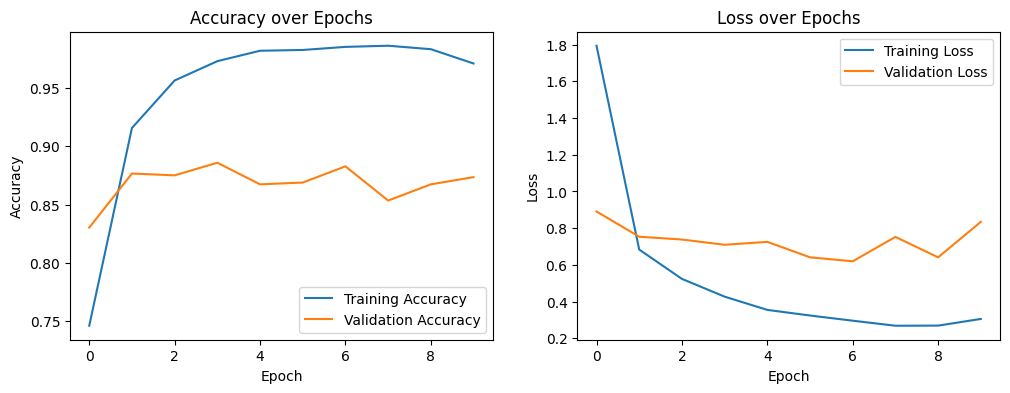

In [55]:
epochs = 10
history = model_with_best_hyperparameters.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val), callbacks=[early_stopping])

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()